In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour générer un vecteur d'utilité
def uti(x, y, n):
    tab = []
    for i in range(n):
        tab.append(np.random.randint(x,y+1))
    return tab

####

#Fonction calculer la valeur optimale Vi
def opt(alpha, U, i):
    if ((i+1)<len(U)):
        valeur = max(alpha[i]*U[i] + (1 - alpha[i])*opt(alpha, U, i+1), opt(alpha, U, i+1))
    elif ((i+1)==len(U)):
        valeur = max(alpha[i]*U[i], 0)
    else:
        valeur = 0

    return valeur
####

In [30]:
import pandas as pd
import numpy as np

#Initialisation des valeurs
N = 20 #nombre de places dans le parking
place1 = 0 #emplacement de depart
place2 = 9

####

Vec_proba = np.random.random(N) #on génère un vecteur de probabilités
Vec_utilite = uti(1, 10, N) #on génère un vecteur d'utilités
ind = np.linspace(1,N,N) #les places de parkinq

d = {
    "Probabilité": pd.Series(Vec_proba, index=ind),
    "Utilité": pd.Series(Vec_utilite, index=ind),
    }

df = pd.DataFrame(d) #affichage des valeurs sous forme de tableau
df

l'utilité optimale obtenue quand le conducteur commence son parcours à partir de la place  1  :  7.084329751969705 

l'utilité optimale obtenue quand le conducteur commence son parcours à partir de la place  10  :  6.508108987798255 



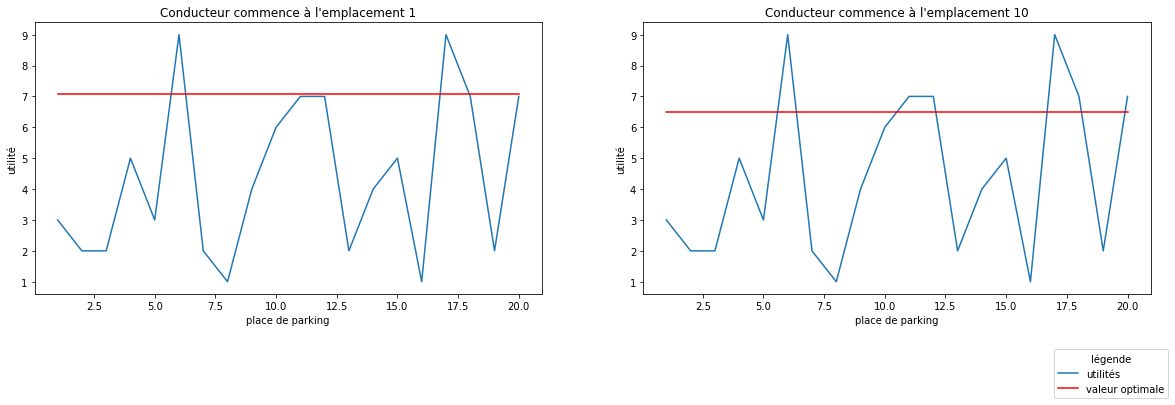

In [37]:
V1 = opt(Vec_proba, Vec_utilite, place1) #la valeur optimale Vi
V2 = opt(Vec_proba, Vec_utilite, place2)

print("l'utilité optimale obtenue quand le conducteur commence son parcours à partir de la place ",place1+1," : ",V1,"\n")
print("l'utilité optimale obtenue quand le conducteur commence son parcours à partir de la place ",place2+1," : ",V2,"\n")

from pylab import *
figure(figsize=(20,5))
ax1 = plt.subplot(1,2,1)
ax1.plot(ind, Vec_utilite, label="utilités")
ax1.plot([1,N], [V1,V1], 'r', label="valeur optimale")
plt.xlabel("place de parking")
plt.ylabel("utilité")
plt.title("Conducteur commence à l'emplacement "+ str(place1+1))
plt.legend( bbox_to_anchor=(2,-0.4), loc='lower left', title='légende')

ax2= plt.subplot(1,2,2)
ax2.plot(ind, Vec_utilite, label="utilités")
ax2.plot([1,N], [V2,V2], 'r', label="valeur optimale")
plt.xlabel("place de parking")
plt.ylabel("utilité")
plt.title("Conducteur commence à l'emplacement "+ str(place2+1))

plt.show()